Лабораторная работа №5
======================

Имеется датасет оценок студентов, полученных ими на различных аттестационных 
    испытаниях, совместно с описательной информацией по каждому студенту.
    
Необходимо проверить критерием Хи-квадрат наличие зависимостей между 3-мя различными парами 
параметров: 

* задание 1. Параметры 'lunch' и 'math score';
* задание 2. Параметры 'race/ethnicity' и 'math score';
* задание 3. Параметры 'gender' и 'reading score'.
    
Для решения задач применять такое разбиение количественных данных, которое считаете нужным 
(это же относится к возможной группировке категориальный значений в более крупные группы). 
Количество групп/категорий не должно быть слишком маленьким или большим. Не следует 
использовать более 5 групп для количественных данных.

Уровень значимости принять равным 0,05.
    
Итоговый файл **Jupyter Notebook** должен содержать полное решение задач, в том числе: 

* номер задачи;
* описательная статистика датафрейма с необходимыми параметрами;
* графики распределения для каждого параметра (для категориальных данных - countplots);
* графики совместных распределений параметров (scatterplots и box-plots (для отображения 
совместного распределения количественных и категориальных признаков));
* таблица сопряженности;
* статистика Хи-квадрат;
* p-значение статистики из соответствующего распределения;
* итоговая гипотеза - результат применения критерия (0 или А);
* вывод исследователя о наличии зависимости (словами).

Студенты НИ реализуют вычисление статистики критерия самостоятельно. Для расчета p-значения 
используют соответствующее распределение Хи-квадрат.

[Ссылка на датасет](https://www.kaggle.com/spscientist/students-performance-in-exams)

In [1]:
from pathlib import Path
from urllib.request import urlretrieve
from functools import lru_cache
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns; sns.set()

In [2]:
alpha = 0.05
ROOT_PATH = Path(".")
LINK = "https://raw.githubusercontent.com/randomunrandom/da_spring2020/master/homework/StudentsPerformance.csv"
ds_path = ROOT_PATH/"StudentsPerformance.csv"

if not ds_path.exists():
    filename, _ = urlretrieve (LINK, ds_path)

df = pd.read_csv(ds_path)
task_1 = df[["lunch", "math score"]]
task_2 = df[["race/ethnicity", "math score"]]
task_3 = df[["gender", "reading score"]]

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
def chi(W):
    W = np.array(W)
    n, m = W.shape
    n, m = n-1, m-1
    N = W[n][m]
    
    stat = N * (np.sum([ (
        W[i][j]**2 /
    #   ----------
        (W[i][m]*W[n][j])
    ) for i in range(n) for j in range(m) ]) -1)
    
    p = stats.chi2.sf(stat, (n-1)*(m-1))

    
    P = np.sqrt(stat/(stat+N))
    
    C = np.sqrt(stat/(N*min(n-1, m-1)))

    return stat, p, P, C

Task 1
------

In [4]:
print(task_1.info())
display(task_1)
task_1.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lunch       1000 non-null   object
 1   math score  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


,lunch,math score
0,standard,72
1,standard,69
2,standard,90
3,free/reduced,47
4,standard,76
...,...,...
995,standard,88
996,free/reduced,62
997,free/reduced,59
998,standard,68


,lunch,math score
count,1000,1000.00000
unique,2,NaN
top,standard,NaN
freq,645,NaN
mean,NaN,66.08900
std,NaN,15.16308
min,NaN,0.00000
25%,NaN,57.00000
50%,NaN,66.00000
75%,NaN,77.00000


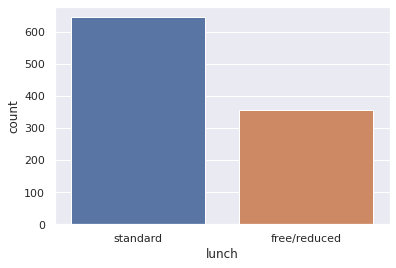

In [5]:
sns.countplot(task_1["lunch"])

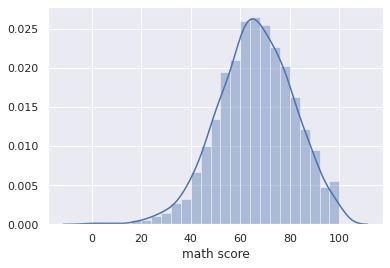

In [6]:
sns.distplot(task_1["math score"])

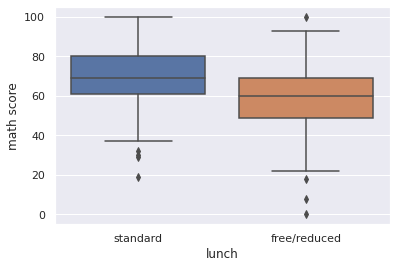

In [7]:
sns.boxplot(task_1["lunch"], task_1["math score"])

In [8]:
task1_crosstab_margins = pd.crosstab(
    task_1["lunch"],
    pd.qcut(
        task_1["math score"],
        4
    ),
    margins=True
)

task1_crosstab = pd.crosstab(
    task_1["lunch"],
    pd.qcut(
        task_1["math score"],
        4
    ),
)

display(task1_crosstab)
task1_crosstab_margins

math score,"(-0.001, 57.0]","(57.0, 66.0]","(66.0, 77.0]","(77.0, 100.0]"
lunch,,,,
free/reduced,155,90,74,36
standard,111,151,190,193


math score,"(-0.001, 57.0]","(57.0, 66.0]","(66.0, 77.0]","(77.0, 100.0]",All
lunch,,,,,
free/reduced,155,90,74,36,355
standard,111,151,190,193,645
All,266,241,264,229,1000


In [9]:
task1_true_s, task1_true_p, _, _ = stats.chi2_contingency(task1_crosstab, correction=False)
task1_s, task1_p, task1_P, task1_C = chi(task1_crosstab_margins)
print(task1_true_s, task1_true_p)
print(task1_s, task1_p)
print(task1_P, task1_C)

106.15272526309407 7.381916808934135e-23
106.15272526309406 7.381916808934188e-23
0.309783318187968 0.32581087345743087


In [10]:
if task1_p >= alpha:
    task1_h = 0
    print("confirm H0")
else:
    task1_h = "A"
    print("reject H0")
    if (task1_P >= 0) and (task1_P < 0.3) and (task1_C >= 0) and (task1_C < 0.3):
        print("слабая сила связи")
    elif (task1_P >= 0.3) and (task1_P < 0,7) and (task1_C >= 0.3) and (task1_C < 0.7):
        print("умеренная сила связи")
    elif (task1_P >= 0.7) and (task1_P <= 1) and (task1_C >= 0.7) and (task1_C <= 1):
        print("умеренная сила связи")
    else:
        print("ошибка")

reject H0
умеренная сила связи


Task 2
------

In [11]:
print(task_2.info())
display(task_2)
task_2.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   race/ethnicity  1000 non-null   object
 1   math score      1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


,race/ethnicity,math score
0,group B,72
1,group C,69
2,group B,90
3,group A,47
4,group C,76
...,...,...
995,group E,88
996,group C,62
997,group C,59
998,group D,68


,race/ethnicity,math score
count,1000,1000.00000
unique,5,NaN
top,group C,NaN
freq,319,NaN
mean,NaN,66.08900
std,NaN,15.16308
min,NaN,0.00000
25%,NaN,57.00000
50%,NaN,66.00000
75%,NaN,77.00000


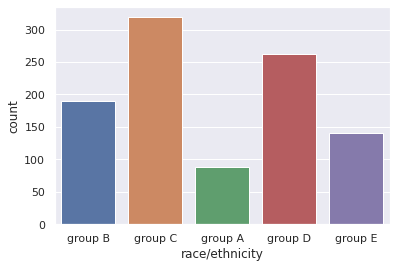

In [12]:
sns.countplot(df["race/ethnicity"])

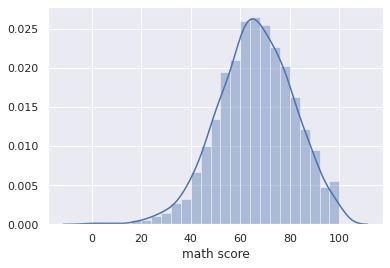

In [13]:
sns.distplot(df["math score"])

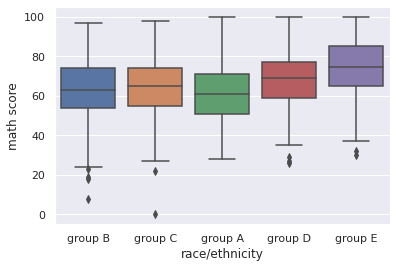

In [14]:
sns.boxplot(df["race/ethnicity"],df["math score"])

In [15]:
task2_crosstab_margins = pd.crosstab(
    task_2["race/ethnicity"],
    pd.qcut(
        task_2["math score"],
        4
    ),
    margins=True
)

task2_crosstab = pd.crosstab(
    task_2["race/ethnicity"],
    pd.qcut(
        task_2["math score"],
        4
    ),
)

display(task2_crosstab)
task2_crosstab_margins

math score,"(-0.001, 57.0]","(57.0, 66.0]","(66.0, 77.0]","(77.0, 100.0]"
race/ethnicity,,,,
group A,36,22,18,13
group B,58,54,44,34
group C,89,90,81,59
group D,61,55,83,63
group E,22,20,38,60


math score,"(-0.001, 57.0]","(57.0, 66.0]","(66.0, 77.0]","(77.0, 100.0]",All
race/ethnicity,,,,,
group A,36,22,18,13,89
group B,58,54,44,34,190
group C,89,90,81,59,319
group D,61,55,83,63,262
group E,22,20,38,60,140
All,266,241,264,229,1000


In [16]:
task2_true_s, task2_true_p, _, _ = stats.chi2_contingency(task2_crosstab, correction=False)
task2_s, task2_p, task2_P, task2_C = chi(task2_crosstab_margins)
print(task2_true_s, task2_true_p)
print(task2_s, task2_p)
print(task2_P, task2_C)

62.32714066579974 8.47087839351384e-09
62.327140665799696 8.470878393513969e-09
0.2422197007370464 0.14413782832853617


In [17]:
if task2_p >= alpha:
    task2h = 0
    print("confirm H0")
else:
    task2h = "A"
    print("reject H0")
    if (task2_P >= 0) and (task2_P < 0.3) and (task2_C >= 0) and (task2_C < 0.3):
        print("слабая сила связи")
    elif (task2_P >= 0.3) and (task2_P < 0,7) and (task2_C >= 0.3) and (task2_C < 0.7):
        print("умеренная сила связи")
    elif (task2_P >= 0.7) and (task2_P <= 1) and (task2_C >= 0.7) and (task2_C <= 1):
        print("умеренная сила связи")
    else:
        print("ошибка")

reject H0
слабая сила связи


Task 3
------

In [18]:
print(task_3.info())
display(task_3)
task_3.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         1000 non-null   object
 1   reading score  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


,gender,reading score
0,female,72
1,female,90
2,female,95
3,male,57
4,male,78
...,...,...
995,female,99
996,male,55
997,female,71
998,female,78


,gender,reading score
count,1000,1000.000000
unique,2,NaN
top,female,NaN
freq,518,NaN
mean,NaN,69.169000
std,NaN,14.600192
min,NaN,17.000000
25%,NaN,59.000000
50%,NaN,70.000000
75%,NaN,79.000000


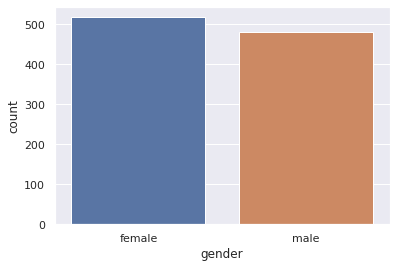

In [19]:
sns.countplot(df["gender"])

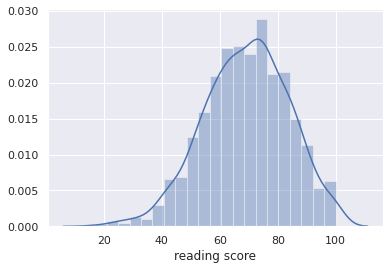

In [20]:
sns.distplot(df["reading score"])

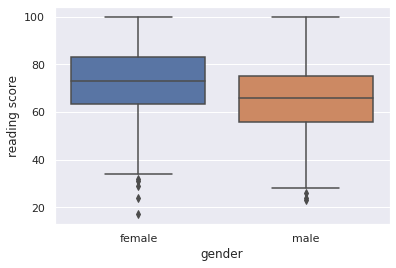

In [21]:
sns.boxplot(df["gender"],df["reading score"])

In [22]:
task3_crosstab_margins = pd.crosstab(
    task_3["gender"],
    pd.qcut(
        task_3["reading score"],
        4
    ),
    margins=True
)

task3_crosstab = pd.crosstab(
    task_3["gender"],
    pd.qcut(
        task_3["reading score"],
        4
    ),
)

display(task3_crosstab)
task3_crosstab_margins

reading score,"(16.999, 59.0]","(59.0, 70.0]","(70.0, 79.0]","(79.0, 100.0]"
gender,,,,
female,91,125,135,167
male,163,134,103,82


reading score,"(16.999, 59.0]","(59.0, 70.0]","(70.0, 79.0]","(79.0, 100.0]",All
gender,,,,,
female,91,125,135,167,518
male,163,134,103,82,482
All,254,259,238,249,1000


In [23]:
task3_true_s, task3_true_p, _, _ = stats.chi2_contingency(task3_crosstab, correction=False)
task3_s, task3_p, task3_P, task3_C = chi(task3_crosstab_margins)
print(task3_true_s, task3_true_p)
print(task3_s, task3_p)
print(task3_P, task3_C)

52.813221331916594 2.0094052944404405e-11
52.81322133191679 2.0094052944402473e-11
0.22397299830279224 0.2298112732916225


In [24]:
if task3_p >= alpha:
    task3_h = 0
    print("confirm H0")
else:
    task3_h = "A"
    print("reject H0")
    if (task3_P >= 0) and (task3_P < 0.3) and (task3_C >= 0) and (task3_C < 0.3):
        print("слабая сила связи")
    elif (task3_P >= 0.3) and (task3_P < 0,7) and (task3_C >= 0.3) and (task3_C < 0.7):
        print("умеренная сила связи")
    elif (task3_P >= 0.7) and (task3_P <= 1) and (task3_C >= 0.7) and (task3_C <= 1):
        print("умеренная сила связи")
    else:
        print("ошибка")

reject H0
слабая сила связи


Вывод:
------

Исходя из того что во всех рассмотрены парах параметров критерий Хи был отклонён, можно сделать вывод, что данные параметры связаны. Другими словами:
* параметры 'lunch' и 'math score' влияют друг на друга с умереной силой связи  по критерию Пирсона и Крамера;
* параметры 'race/ethnicity' и 'math score' влияют друг на друга со слабой силой связи по критерию Пирсона и Крамера;
* параметры 'gender' и 'reading score' влияют друг на друга со слабой силой связи по критерию Пирсона и Крамера.